## **Image Classification**

In this note book ,we will classify small images cfar10 dataset from tensorflow keras datasets.There are total 10 classes of images


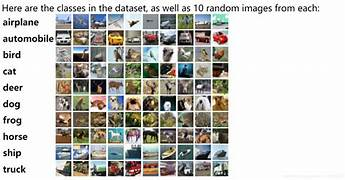

Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [ ]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

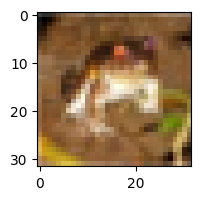

In [ ]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[0])

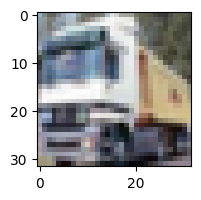

In [ ]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[1])

In [ ]:
# for labelling of images

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[:5]## 2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes[9]

'truck'

In [ ]:
# y-train is 2D array, for our classification 1D array is good enough.so we will convert this to 1D array.

y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]  ## 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

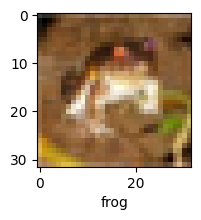

In [ ]:
plot_sample(X_train,y_train,0)

Normalize the images to a number from 0 to 1.Image has 3 channels(R,G,B) and each value in the channel ca be range from 0-255. Hence to normalize in 0-1 range,we need to divide it by 255

In [ ]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
## ANN MODEL BUILDING

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])


ann.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


ann.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 25s 14ms/step - loss: 1.8847 - accuracy: 0.3279
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6619 - accuracy: 0.4029
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5776 - accuracy: 0.4348
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5239 - accuracy: 0.4554
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4883 - accuracy: 0.4682
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4541 - accuracy: 0.4792
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4291 - accuracy: 0.4876
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4052 - accuracy: 0.4952
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3829 - accuracy: 0.5043
Epoch 10/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.52      0.66      0.58      1000
           2       0.39      0.34      0.37      1000
           3       0.36      0.30      0.33      1000
           4       0.51      0.30      0.38      1000
           5       0.38      0.42      0.40      1000
           6       0.54      0.53      0.53      1000
           7       0.46      0.65      0.54      1000
           8       0.65      0.55      0.60      1000
           9       0.51      0.53      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [ ]:
## CNN Model Building
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size= (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')


])

In [ ]:
from keras.callbacks import EarlyStopping

In [25]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
cnn.fit(X_train,y_train,epochs = 100,validation_data =(X_test,y_test), callbacks = [callback])


Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0699 - accuracy: 0.9785 - val_loss: 4.6270 - val_accuracy: 0.6598
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0499 - accuracy: 0.9837 - val_loss: 4.8421 - val_accuracy: 0.6670
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 4.6735 - val_accuracy: 0.6584
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 4.6255 - val_accuracy: 0.6686
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 4.5885 - val_accuracy: 0.6629
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 4.6140 - val_accuracy: 0.6690
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 4.8703 - val_ac

In [26]:
y_predict = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.8796232e-03, 3.7768770e-02, 1.2289354e-02, 4.2945376e-01,
        3.2673486e-02, 1.5472823e-01, 1.9601541e-02, 1.5562979e-02,
        2.8423548e-01, 5.8068223e-03],
       [5.8189802e-02, 3.0452165e-01, 2.1797894e-02, 1.6615764e-04,
        3.3495552e-04, 6.6273642e-06, 1.6060914e-05, 1.5026955e-04,
        2.3016524e-01, 3.8465133e-01],
       [1.8604630e-01, 4.2550188e-01, 1.0320180e-02, 1.1079885e-03,
        4.9305730e-03, 4.4942356e-04, 3.2298051e-06, 7.3527666e-03,
        8.2810730e-02, 2.8147691e-01],
       [3.5809064e-01, 1.6602270e-01, 9.7124577e-02, 7.5145215e-03,
        9.4016353e-03, 9.0678874e-04, 1.1116296e-04, 6.6616006e-02,
        1.3129240e-01, 1.6291952e-01],
       [3.6632529e-04, 5.1632805e-06, 3.5326473e-02, 4.6927683e-02,
        6.7000097e-01, 1.7699281e-02, 2.1856701e-01, 1.0666975e-02,
        4.1268111e-04, 2.7453443e-05]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 1, 0, 4]

In [29]:
classes[y_classes[3]]

'airplane'

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report:\n",classification_report(y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.52      0.66      0.58      1000
           2       0.39      0.34      0.37      1000
           3       0.36      0.30      0.33      1000
           4       0.51      0.30      0.38      1000
           5       0.38      0.42      0.40      1000
           6       0.54      0.53      0.53      1000
           7       0.46      0.65      0.54      1000
           8       0.65      0.55      0.60      1000
           9       0.51      0.53      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

